## Class 2 - Defining evaluation metrics and fitting basic regression models
In our second lecture, we discussed a number of algorithms and evaluation metrics for regression problems. Today, we will go back to the datasets we looked at last week, and implement some of these algorithms and evaluation metrics on the predictive modeling problems we have defined. 

We will do all of this using `scikit-learn`. A couple of useful pointers to useful documentation, before we start:
- In general, the scikit-learn documentation is your friend: https://scikit-learn.org/stable/
- Here is a list of linear models implemented as Extractors/Predictors in sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
- Here are different forms of neighbor-based models (we talked about `KNNRegressor` yesterday)
- Here are evaluation metrics implemented in sklearn: https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics 
- Here are utilities for preprocessing steps: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing 

**Note**: Under `nbs/class_02` you will find a notebook called `example.ipynb`, where I provide an example of how to run today's exercise on simulated data.

### Today's exercise
Gather in the same or similar groups as last week. Under `class/class_02.md` you will find two predictive modeling questions, one for each datasets. There are different variants of the same questions, which differ in which outcome you want to predict.

What I would like you to do today is the following:
1. Create a folder called `group-x` within `nbs/class_02`, `cd` into it and work within that today
2. Choose an outcome variable for a regression problem. On the basis of this, define **which of the evaluation metrics** could be suitable. Evaluation metrics can be computed using scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 
3. (a) If you are in the bike sharing group, split your dataset into a training/validation/test set using later time points as validation/test set. Validation and test set should be 15% of your data each. (b) If you are in the personality group, using sklearn's `train_test_split` function, create a 70/15/15 random split of your data.
    - Remember to set a seed (`random_state`) when you do so. Let's all use the same (the classic `random_state=42`)
    - Save these datasets as separate csv files in a subfolder called `data`
4. Look at your outcome and predictors: do you want to transform them in any way?
5. Estimate the performance of a dummy baseline (i.e., the mean model) on all splits
6. Now look at your predictors: do they need any preprocessing? Any transformations? Removal of "bad" data points?
7. Fit the other models using KKN (sklearn's `KNeighborsRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) and linear models (`LinearRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Save the fitted model object (with a meaningful name) using `pickle` (https://scikit-learn.org/stable/model_persistence.html) in a subfolder called `model`.
8. Once you are done, evaluate all models on both the training and the validation set and visualize the scores


### Once you have done this
Please submit a pull request to my repository where, within `nbs/class_02/group-x` you have: 
- the notebook on which you have worked
- a subfolder called `data` containing your splits
- a subfolder called `models` containing your models

In next week's class, I will ask each group to briefly present their results.

# Solution

In [34]:
# Get libraries in
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns

import pickle as pkl

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


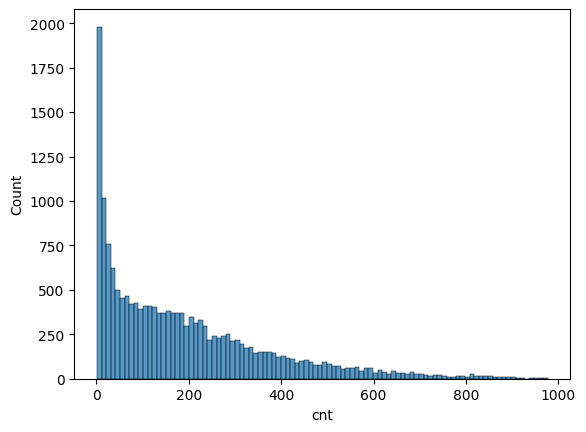

In [35]:
# Get data
bikes = pd.read_csv("/work/data/class_01/bikes.csv")

# Get to know her
bikes.shape
bikes.info()
bikes.describe()

# Looking at the distribution of the outcome
sns.histplot(data=bikes, x='cnt', binwidth=10)
plt.show()

In [36]:
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


1.12.0


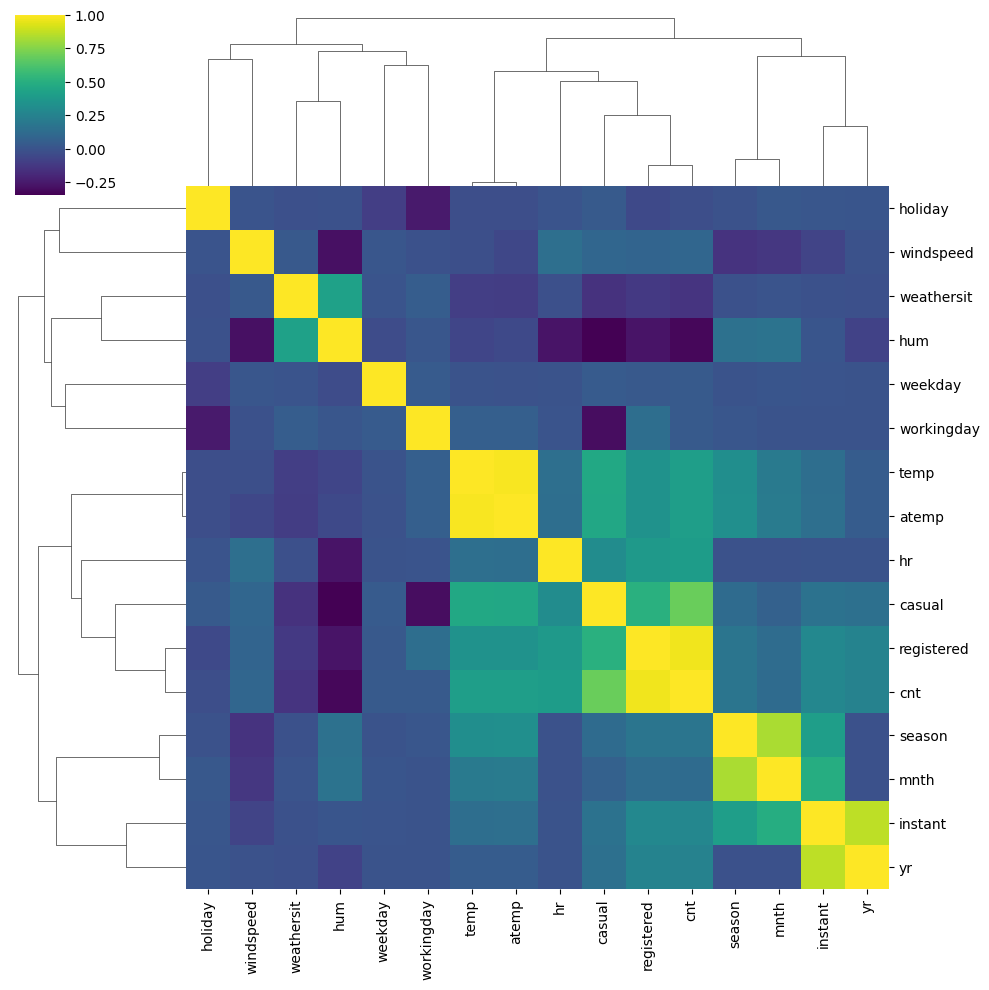

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
print(scipy.__version__)

# Get numeric cols
numeric_cols = bikes.select_dtypes(include=['float', 'int64'])

# Calculate the correlation matrix on the selected numeric columns
corr_matrix = numeric_cols.corr()

# Plot the clustermap
sns.clustermap(corr_matrix, cmap='viridis')
plt.show()

In [38]:
len(bikes.columns)

17

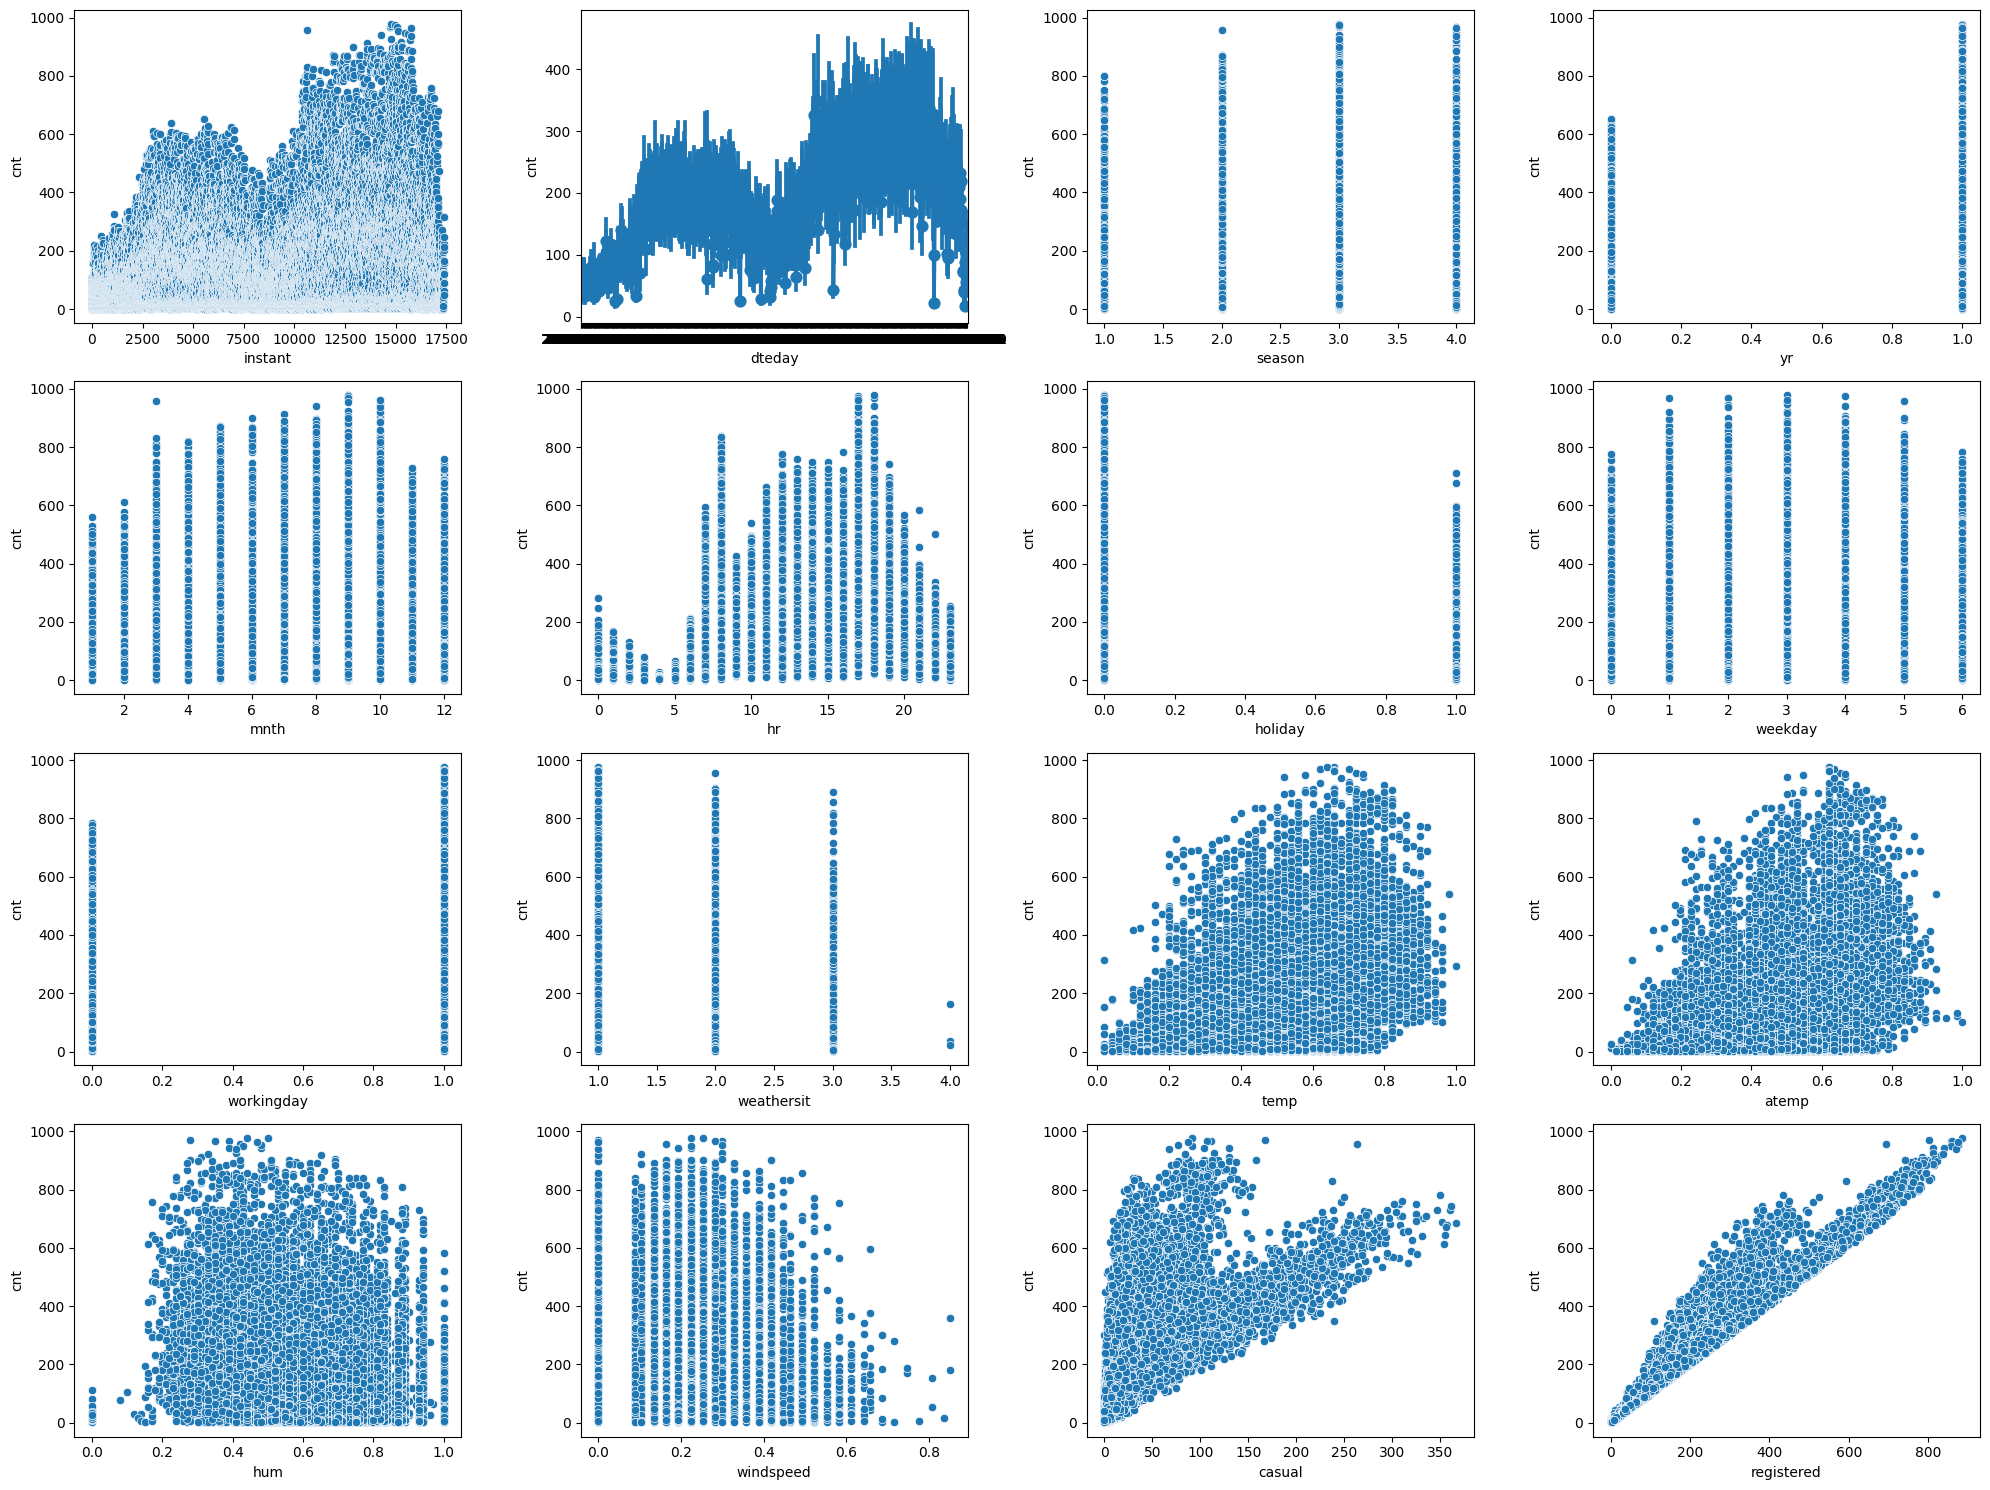

In [39]:
# Let's look closer 
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
plot_idx = list(itertools.product(range(4), range(4)))  # Adjusted for a 4x4 grid

for i,c in enumerate(bikes.columns):
    if c != 'cnt':
        if c == 'dteday':
            sns.pointplot(data=bikes, x=c, y='cnt', ax=ax[plot_idx[i]])
        else:
            sns.scatterplot(data=bikes, x=c, y='cnt', ax=ax[plot_idx[i]])
plt.tight_layout()
plt.show()

From exampe doc: We are dealing with a regression problem where we care about knowing, in interpretable units, how off our predictions are. Big errors are kind of an issue here, so let's sacrifice some direct interpretability in favor of caution. We'll use RMSE.

### Train-dev-test split
Let's use scikit-learn's utils to create three data splits. First, we need to get our data to numpy arrays. This can be done easily in pandas. Note that we want to create 70/15/15 splits.

In [40]:
X = bikes.iloc[:,:16].values # selects all rows (:) and the columns from the start up to, but not including, the column at index 16
y = bikes.iloc[:,16].values # specifically selects all rows (:) and the column at index 16, which is the 17th column of the DataFrame (since indexing starts at 0).

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42, shuffle = False) 

# let's further split the training set into a training and a validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size=X_test.shape[0] / X_train.shape[0],  
                                                  random_state=42)


In [42]:
# Save data to be able to load it next time
for x,y,name in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]))
    df.columns = bikes.columns
    df.to_csv(f'bikes-data/{name}.csv')

### Modeling
One of the questions asked in the exercise is whether we want to transform the data. In our case, we might be okay with no transformation and we might want to retain interpretability of the output. Let's make this assumption, and work on non-transformed data.

### Our models
Let's define a few models we want to estimate:
- Model 0 (dummy baseline): Always predict the average of Y in the training data
- Model 1: Predict based on a linear model with `instant` as the only predictor
- Model 2: Model including weather info (temperature, windspeed) and temporal parameters (e.g., `season`, `weekday`) as predictors
- Model 3: A "kitchen sink" model, will all predictors included

For Model 2, we will fit both KNN and linear regression models.

First, let's create a list where we will store performance data, and compute the performance of our baseline

In [43]:
performances = []

### Model 0: (dummy baseline): Always predict the average of Y in the training data

In [44]:
mean_value = y_train.mean()
model_name = 'model_0'

for y,nsplit in zip([y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    performance = np.sqrt(mean_squared_error(y, 
                                             [mean_value]*y.shape[0]))
    r2 = r2_score(y, [mean_value]*y.shape[0])
    performances.append({'model': model_name,
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [45]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Model 1: Predict based on a linear model with `instant` as the only predictor

In [46]:
from sklearn.linear_model import PoissonRegressor
import pickle as pkl

# Get instant var (the use of np.newaxis to keep it as a 2D array)
X_train_col = X_train[:, 0, np.newaxis]

# Fit the Poisson regression model
reg = PoissonRegressor().fit(X_train_col, y_train)

# Save the model using pickle
pkl.dump(reg, open('bikes-models/model1.pkl', 'wb'))


In [47]:
for x, y, nsplit in zip([X_train, X_val, X_test],
                        [y_train, y_val, y_test],
                        ['train', 'val', 'test']):
    # Correctly select the first column for prediction
    preds = reg.predict(x[:, 0, np.newaxis]) # Selecting the first var with newaxis
    r2 = r2_score(y, preds)
    performance = np.sqrt(mean_squared_error(y, preds))
    performances.append({'model': 'model1',
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

### Model 2: Model including weather info (temperature, windspeed) and temporal parameters (e.g., `season`, `weekday`) as predictors
Based on bikes.info(), the columns by their indices are:

- `season` (index 2)
- `weekday`(index 7)
- `temp` (index 10)
- `windspeed` (index 13)

In [53]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [56]:
from sklearn.linear_model import PoissonRegressor
import pickle as pkl

# Get vars
relevant_indices = [2, 7, 10, 13]

# Apply column selection to each dataset using the indices
X_train_cols = X_train[:, relevant_indices]

# Fit the Poisson regression model
reg = PoissonRegressor().fit(X_train_cols, y_train)

# Save the model using pickle
pkl.dump(reg, open('bikes-models/model2.pkl', 'wb'))


In [57]:
for x, y, nsplit in zip([X_train, X_val, X_test],
                        [y_train, y_val, y_test],
                        ['train', 'val', 'test']):
    # Correctly select the first column for prediction
    x_cols = x[:, relevant_indices]
    preds = reg.predict(x_cols)
    r2 = r2_score(y, preds)
    performance = np.sqrt(mean_squared_error(y, preds))
    performances.append({'model': 'model1',
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [ ]:
# have to make the last one